# Mathematical Underpinnings - Lab 4

In [40]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
#import mutual_info_score
from sklearn.metrics import mutual_info_score

import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [41]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [42]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

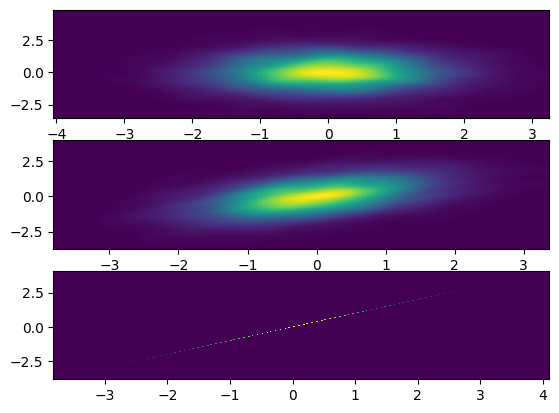

In [43]:
fig, axs = plt.subplots(3)

n = 5000
np.random.seed(517)

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [44]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [45]:
def discretize_data(data):
    return np.digitize(data, np.histogram_bin_edges(data, bins=10))

def generate_data(rho, n = 5000, seed = 123):
    np.random.seed(seed)
    return np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], n)
    

In [46]:
def calculate_pearson_mi(data):
    data_discrete = discretize_data(data)
    return [pearsonr(data[:,0], data[:,1]).statistic, mutual_info_classif(data_discrete[:,0].reshape(-1,1), data_discrete[:,1])[0]]


In [47]:
rho = 0
data = generate_data(rho)
calculate_pearson_mi(data)

[0.03157193439133166, 0.0032418976990036263]

In [48]:
# calculate results for different rhos 100 times
N = 100
rhos = [i/10 for i in range(-10, 11)]

results_pearson = {rho: [] for rho in rhos}
results_mi = {rho: [] for rho in rhos}

for rho in rhos:
    for i in range(N):
        data = generate_data(rho, seed = abs(round(100*rho*i)))
        pmi = calculate_pearson_mi(data)
        results_pearson[rho].append(pmi[0])
        results_mi[rho].append(pmi[1])



In [49]:
import pandas as pd
df1 = pd.DataFrame().from_dict(results_pearson)
# df2 = 
df1 = pd.DataFrame(df1.stack()).reset_index()
df2 = pd.DataFrame().from_dict(results_mi)
df2 = pd.DataFrame(df2.stack()).reset_index()

df1 = df1.rename(columns = {"level_0": "N", "level_1": "rho", 0: "pearson"})
df2 = df2.rename(columns = {"level_0": "N", "level_1": "rho", 0: "mi"})

df = df1.join(df2, lsuffix = "_l", rsuffix = "_r")




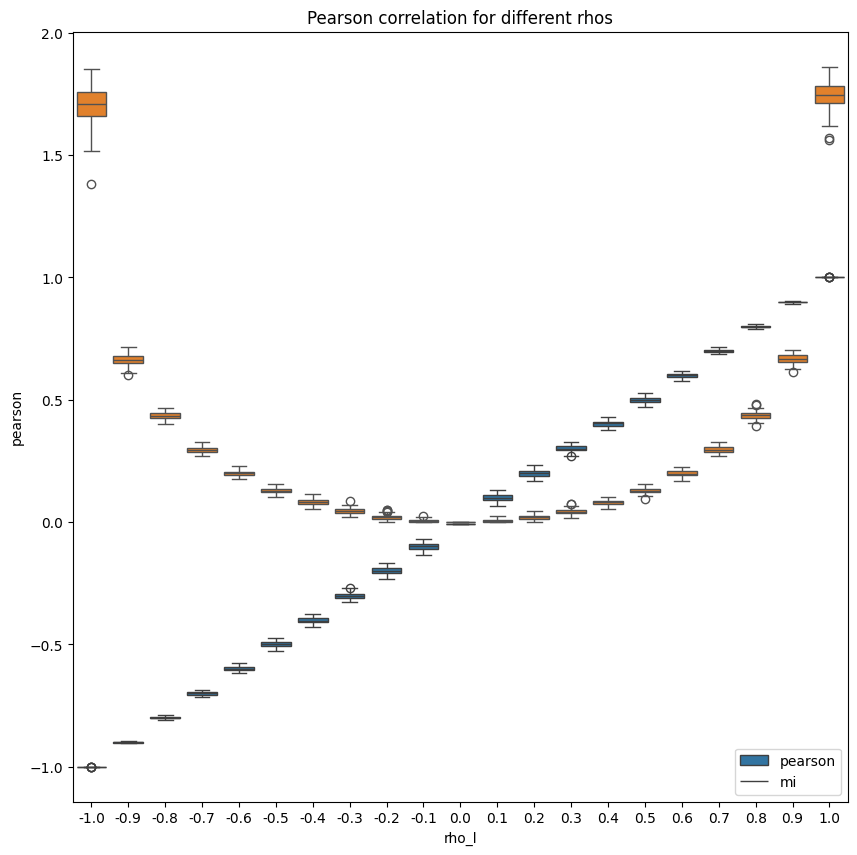

In [50]:
fig = plt.figure(figsize = (10, 10))

sns.boxplot(data = df, x = "rho_l", y = "pearson")
sns.boxplot(data = df, x = "rho_r", y = "mi")
plt.title("Pearson correlation for different rhos") 
plt.legend(["pearson", "mi"])
plt.show()

#### bp 3)

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

/home/nick/Documents/Uczelnia/Magisterka/Semestr 3/MUML/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nick/Documents/Uczelnia/Magisterka/Semestr 3/MUML/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


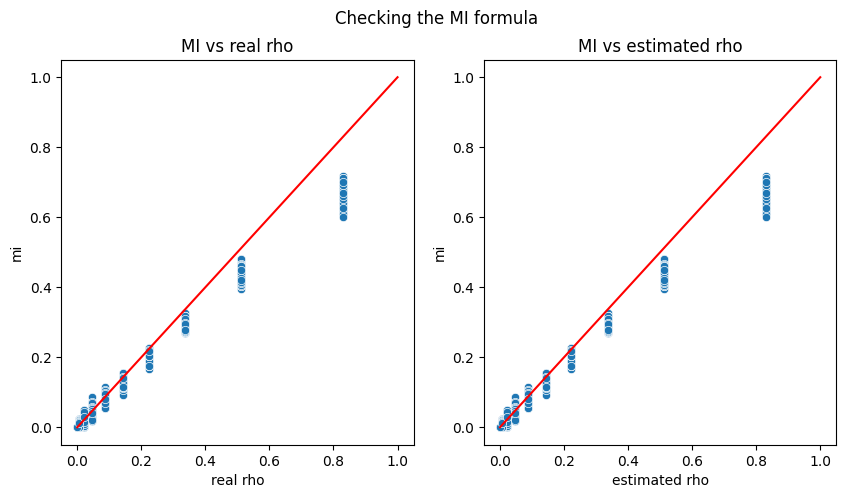

In [51]:
df["transform_1"] = -np.log(1-df["rho_l"]**2)/2
df["transform_2"] = -np.log(1-df["rho_r"]**2)/2

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.scatterplot(data = df, x = "transform_1", y = "mi", ax = ax[0])
sns.scatterplot(data = df, x = "transform_2", y = "mi", ax = ax[1])

x = np.linspace(0, 1, 100)
ax[0].plot(x, x, 'r')
ax[0].set_title("MI vs real rho")
ax[0].set_xlabel("real rho")
ax[1].plot(x, x, 'r')
ax[1].set_title("MI vs estimated rho")
ax[1].set_xlabel("estimated rho")
plt.suptitle("Checking the MI formula")
plt.show()

### b)

#### bp 1)

In [52]:
# again: this is too time consuming so here is an answer

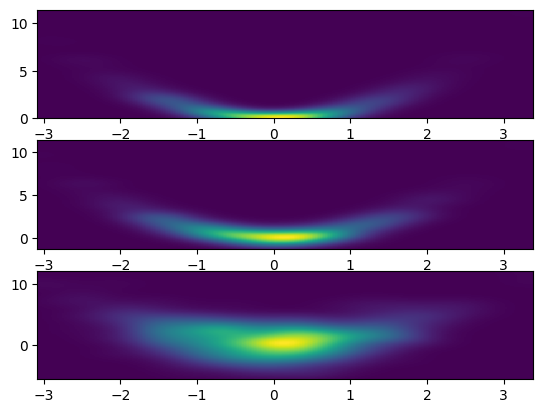

In [53]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [54]:
def generate_data2(sigma, n = 1000, seed = 123):
    np.random.seed(seed)
    x = np.random.normal(0, 1, n)
    return np.array([x, x**2 + np.random.normal(0, sigma, n)]).T

In [55]:
# calculate results for different sigma 100 times
N = 100
rhos = [i/20 for i in range(0, 21)]

results_pearson2 = {rho: [] for rho in rhos}
results_mi2 = {rho: [] for rho in rhos}

for rho in rhos:
    for i in range(N):
        data = generate_data2(rho, seed = abs(round(100*rho*i+1)))
        pmi = calculate_pearson_mi(data)
        results_pearson2[rho].append(pmi[0])
        results_mi2[rho].append(pmi[1])

In [56]:
import pandas as pd
df1 = pd.DataFrame().from_dict(results_pearson2)
df1 = pd.DataFrame(df1.stack()).reset_index()
df2 = pd.DataFrame().from_dict(results_mi2)
df2 = pd.DataFrame(df2.stack()).reset_index()

df1 = df1.rename(columns = {"level_0": "N", "level_1": "sigma", 0: "pearson"})
df2 = df2.rename(columns = {"level_0": "N", "level_1": "sigma", 0: "mi"})

df = df1.join(df2, lsuffix = "_l", rsuffix = "_r")


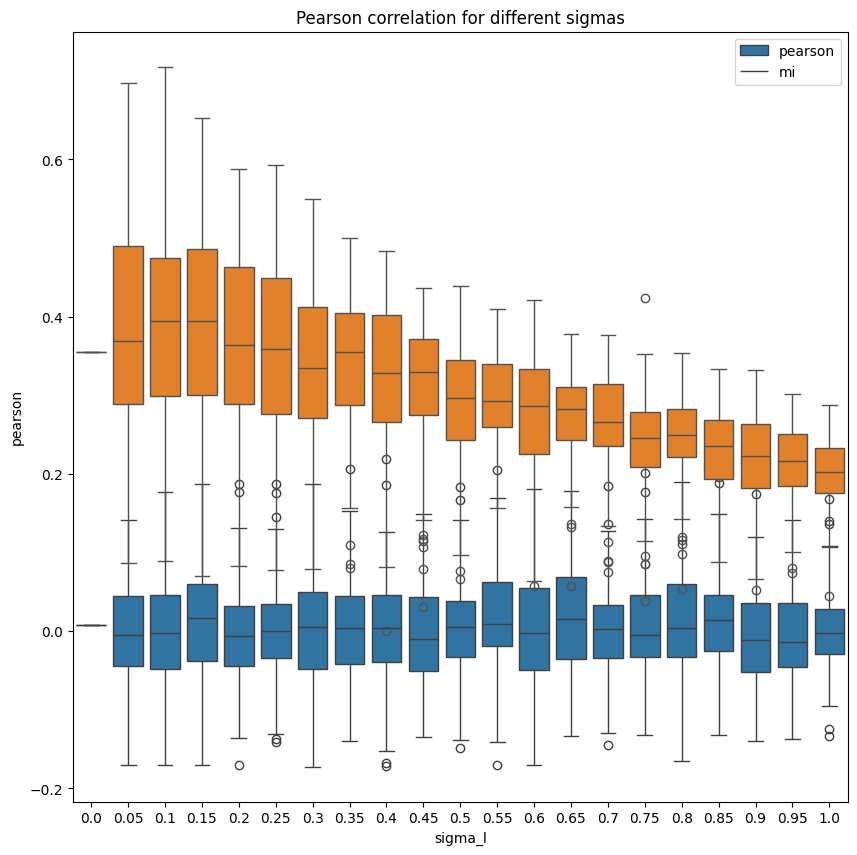

In [57]:
fig = plt.figure(figsize = (10, 10))

sns.boxplot(data = df, x = "sigma_l", y = "pearson", legend = "auto")
sns.boxplot(data = df, x = "sigma_r", y = "mi", legend = "auto")
plt.title("Pearson correlation for different sigmas") 
plt.legend(["pearson", "mi"])
plt.show()

## Task 2

### a)

In [58]:
def asymptotic_test(X, Y, statistic = "pearson", bins = 10):
    discretized_X = np.digitize(X, np.histogram_bin_edges(X, bins=bins))
    discretized_Y = np.digitize(Y, np.histogram_bin_edges(Y, bins=bins))
    deg_free = (len(np.unique(discretized_X))-1)* (len(np.unique(discretized_Y))-1)

    histogram = np.histogram2d(discretized_X, discretized_Y, bins = bins)[0]
    
    if statistic == "pearson":
        stat = chi2_contingency(histogram)[0]
        return stat, 1 - chi2.cdf(stat, deg_free)
    elif statistic == "mi":
        n = len(X)
        mi = mutual_info_score(discretized_X, discretized_Y)
        return 2*n*mi, 1 - chi2.cdf(2*n*mi, deg_free)


### b)

In [59]:
def permutation_test(X, Y, B=100):

    discretized_X = np.digitize(X, np.histogram_bin_edges(X, bins=10))
    discretized_Y = np.digitize(Y, np.histogram_bin_edges(Y, bins=10))
    observed = mutual_info_classif(discretized_X.reshape(-1,1), discretized_Y)
    results = []

    for i in range(B):
        np.random.shuffle(discretized_X)
        mi = mutual_info_classif(discretized_X.reshape(-1,1), discretized_Y)
        results.append(mi)

    return observed[0], (1 + np.sum(results >= observed))/(1+B)



### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [60]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

np.random.seed(517)
X = np.random.normal(0, 1, 2000)
Y = np.random.normal(0, 1, 2000)

print(asymptotic_test(X, Y, statistic = "pearson"))
print(asymptotic_test(X, Y, statistic = "mi"))
print(permutation_test(X, Y, B=100))

(69.0093038131675, 0.9922769498136635)
(69.64340519611979, 0.990968418326156)
(0.018187130450295186, 0.12871287128712872)


**All tests do not allow for rejecting the null hypothesis at** $\alpha = 0.05$

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [61]:
# independent r.v. - ideally we will reject the null hypothesis

np.random.seed(517)
X = np.random.normal(0, 1, 1000)
Y = np.hstack([X[:500], np.random.normal(1, 1, 500)])

print(asymptotic_test(X, Y, statistic = "pearson"))
print(asymptotic_test(X, Y, statistic = "mi"))
print(permutation_test(X, Y, B=200))

(2176.715056007849, 0.0)
(737.1219173542913, 0.0)
(0.3398892681544279, 0.004975124378109453)


**All tests reject the null hypothesis**